In [92]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
#%config InlineBackend.figure_format = 'svg'

def read_energy(file) -> tuple[np.ndarray, np.ndarray]:
    x_vals = []
    y_vals = []
    with open(file) as f:
        for s in f.readlines():
            time, energy = map(float, s.split())
            x_vals.append(time)
            y_vals.append(energy)
    return np.array(x_vals), np.array(y_vals)

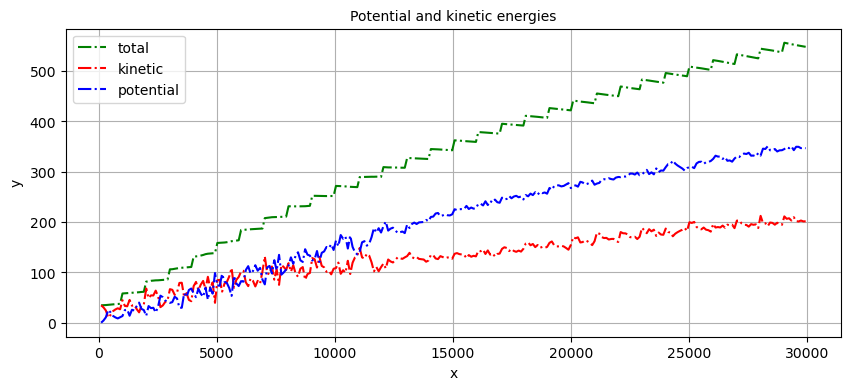

In [93]:
#base_path = "../data/milestone07/dot5-100/"
base_path = "../buildDir/milestones/07/"
x, y_tot = read_energy(base_path + "total_energy.txt")
_, y_k = read_energy(base_path + "kinetic_energy.txt")
_, y_p = read_energy(base_path + "potential_energy.txt")

p0 = y_p[0]
for i in range(len(y_p)):
    y_p[i] -= p0
    y_tot[i] -= p0

# задаем размеры
plt.figure(figsize=(10,4))

# заголовок 
plt.title('Potential and kinetic energies',fontsize=10)

# рисуем графики
plt.plot(x, y_tot, linestyle='-.', color='g', label='total')
plt.plot(x, y_k, linestyle='-.', color='r', label='kinetic')
plt.plot(x, y_p, linestyle='-.', color='b', label='potential')

# linestyle: '--' - dashed line style, '-.'- dash-dot line style, ...
# color: r, g, b, ...
# marker: '.', 'o', '+', ...

#сетка графика
plt.grid(True) 

# разметка осей
# plt.xticks([math.pi * x for x in range(-3, 4)], ["-3$\pi$", "-2$\pi$", "-$\pi$", "0", "$\pi$", "2$\pi$", "3$\pi$"])
# plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)

# легенда
plt.legend(fontsize=10)

plt.show()

# сохранить
#plt.savefig('fig.pdf')

In [94]:
def sliding_average(arr: np.ndarray, window):
    return np.convolve(arr, [1] * window, 'same') / window

a = np.array([3, 0, 3])
sliding_average(a, 3)

array([1., 2., 1.])

In [95]:
#base_path = "../data/milestone07/dot5-100/"
base_path = "../buildDir/milestones/07/"
x, y_tot = read_energy(base_path + "total_energy.txt")
_, y_k = read_energy(base_path + "kinetic_energy.txt")
_, y_p = read_energy(base_path + "potential_energy.txt")
_, t = read_energy(base_path + "temperature.txt")

p0 = y_p[0]
for i in range(len(y_p)):
    y_p[i] -= p0
    y_tot[i] -= p0

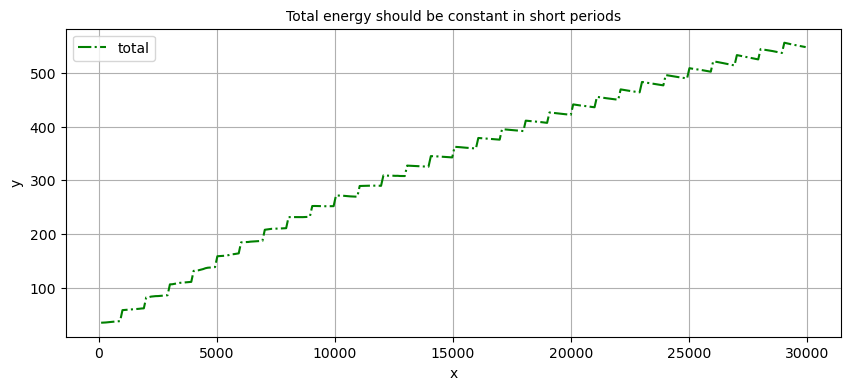

In [96]:
plt.figure(figsize=(10,4))
plt.title('Total energy should be constant in short periods',fontsize=10)

plt.plot(x, y_tot, linestyle='-.', color='g', label='total')

plt.grid(True)
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)
plt.legend(fontsize=10)
plt.show()
#plt.savefig('fig.pdf')

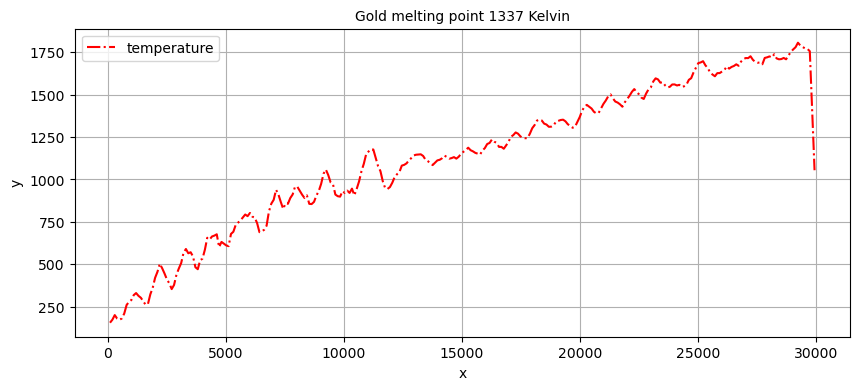

In [97]:
plt.figure(figsize=(10,4))
plt.title('Gold melting point 1337 Kelvin',fontsize=10)

#plt.plot(x, y_tot, linestyle='-.', color='g', label='total')
#plt.plot(x, sliding_average(y_k, 20), linestyle='-.', color='r', label='kinetic')
plt.plot(x, sliding_average(t, 5), linestyle='-.', color='r', label='temperature')

plt.grid(True)
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)
plt.legend(fontsize=10)
plt.show()
#plt.savefig('fig.pdf')

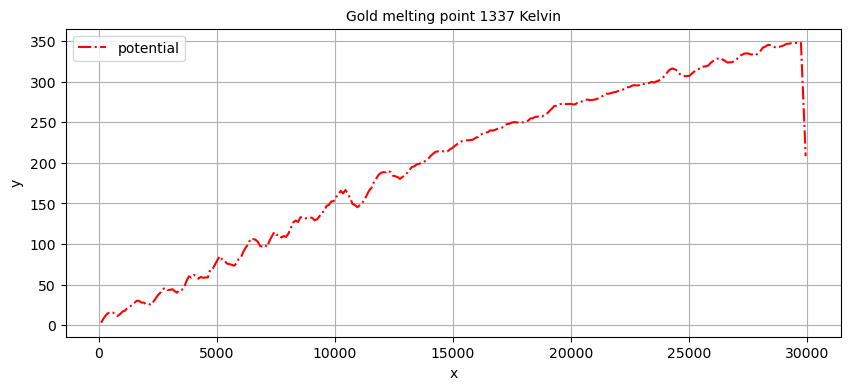

In [98]:
plt.figure(figsize=(10,4))
plt.title('Gold melting point 1337 Kelvin',fontsize=10)

#plt.plot(x, y_tot, linestyle='-.', color='g', label='total')
plt.plot(x, sliding_average(y_p, 5), linestyle='-.', color='r', label='potential')
#plt.plot(x, sliding_average(y_k, 3), linestyle='-.', color='r', label='kinetic')
#plt.plot(x, sliding_average(t, 10), linestyle='-.', color='r', label='temperature')

plt.grid(True)
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)
plt.legend(fontsize=10)
plt.show()
#plt.savefig('fig.pdf')